In [72]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pims
import pandas as pd

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 19
from matplotlib.animation import FuncAnimation
# import matplotlib.pyplot as plt
# from numba import njit
from scipy.optimize import curve_fit



In [109]:
def read_dat_file(filename):
    params = {}
    
    # Read the .dat file
    with open(filename, 'r') as file:
        for line in file:
            key, value = line.split()
            params[key] = value
    
    # Format the output string
    output_string = (
        f"particle_positions_Dt_{params['Dt']}_Nparticles_{params['Nparticles']}_R_{params['R']}_T_{params['T']}_Vo_{params['Vo']}_aligstr_{params['aligstr']}_box_{params['box']}_cutoff_{params['cutoff']}_epsilon_{params['epsilon']}_eta_{params['eta']}_sigma_{params['sigma']}"
    )
    
    return output_string,params


In [145]:
def read_dat_file_OP(filename):
    params = {}
    
    # Read the .dat file
    with open(filename, 'r') as file:
        for line in file:
            key, value = line.split()
            params[key] = value
    
    # Format the output string
    output_string = (
        f"squared_disp_Dt_{params['Dt']}_Nparticles_{params['Nparticles']}_R_{params['R']}_T_{params['T']}_Vo_{params['Vo']}_aligstr_{params['aligstr']}_box_{params['box']}_cutoff_{params['cutoff']}_epsilon_{params['epsilon']}_eta_{params['eta']}_sigma_{params['sigma']}"
    )
    
    return output_string

In [107]:
file_name,params

('particle_positions_Dt_0.1_Nparticles_100_T_100_Vo_1_aligstr_0.5_box_80_cutoff_0.5_epsilon_1_eta_0.8_sigma_1',
 {'box': '80',
  'cutoff': '0.5',
  'Nparticles': '100',
  'Vo': '1',
  'eta': '0.8',
  'sigma': '1',
  'epsilon': '1',
  'aligstr': '0.5',
  'T': '100',
  'Dt': '0.1'})

In [15]:

def read_positions(filename,N):
    data= np.loadtxt(filename)
    X = data[:,0]
    Y = data[:,1]
    Theta = data[:,2]
    Steps = len(X) //N 
    X = np.reshape(X,(Steps,N))
    Y = np.reshape(Y,(Steps,N))
    Theta = np.reshape(Theta,(Steps,N))
    return X,Y,Theta


In [80]:
file_name

'particle_positions_Dt_0.1_Nparticles_100_T_100_Vo_1.0_aligstr_0.5_box_80_cutoff_0.5_epsilon_1.0_eta_0.8_sigma_1.0'

In [158]:

import os

file_name,params = read_dat_file('params.dat')
N=int(params['Nparticles'])
T = int(params['T'])
# file_name = f'particle_positions_Dt_0.1_Nparticles_100_T_100_Vo_1_aligstr_0.5_box_80_cutoff_0.5_epsilon_0.5_eta_0.8_sigma_1'

os.makedirs(file_name,exist_ok=True)
X,Y,Theta = read_positions(file_name+'.dat',N)
fig, ax1 = plt.subplots(figsize=(5,5))  
BOX_SIZE = float(params['box'])
max_x = X.max()
max_y = Y.max()
scale = 1.0
sigma =float(params['sigma'])*0.6
# x,y = [], []
for time in range(T):
    ax1.clear()
    Xnow = X[time]
    Ynow = Y[time]
    Thetanow=Theta[time]
    # print(Thetanow)
    # Xnext = X[time+1]
    # Ynext = Y[time+1]
    # Xp_now = Xp[time]
    # Yp_now = Yp[time]
    for posx, posy,angle in zip(Xnow, Ynow,Thetanow):
        # lx= abs(-dx + posx)
        # ly = abs(-dy + posy)
        dx = np.cos(angle)*scale
        dy = np.sin(angle)*scale
        
        ax1.arrow(posx, posy, dx, dy, head_width=1.5*sigma, head_length=sigma*1.5,color='black')
        # ax1.add_patch(plt.Circle((posx, posy), radius=sigma, fill=True,color='red'))
        
        # if lx >= BOX_SIZE/2 or ly >= BOX_SIZE/2:
        #     ax1.plot(posx,posy,lw=0,marker='o',ms=0.01)
        # else:
        #     ax1.plot(np.array([posx,dx]),np.array([posy,dy]))
        
        
        ax1.set_title(f'time {time}',fontsize=12,loc='left')
        
    ax1.set_xlim(0,BOX_SIZE)
    ax1.set_ylim(0,BOX_SIZE)
    # ax1.set_xticks([0,BOX_SIZE//2, BOX_SIZE])
    # ax1.set_yticks([0,BOX_SIZE//2, BOX_SIZE])
    ax1.set_xticks([])
    ax1.set_yticks([])
    # ax1.set_xlabel(r'$x$')
    # ax1.set_ylabel(r'$y$')
    # ax1.set_aspect('equal', adjustable='box')
    plt.tight_layout()
    plt.savefig(f"{file_name}/positions_{time:03d}.png",dpi=200)
plt.close()

In [152]:
Px = np.average(np.cos(Theta),axis=1)
Py = np.average(np.sin(Theta),axis=1)
P = np.sqrt(Px**2 + Py**2)


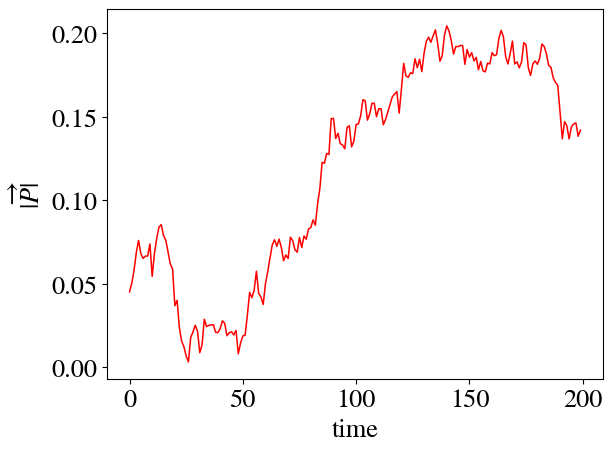

In [153]:
fig,ax = plt.subplots()

ax.plot(np.arange(T),P, lw=1.1, color='red')
ax.set_xlabel('time')
ax.set_ylabel(r'$|\overrightarrow{P}|$')

plt.show()

In [160]:
params

{'box': '50',
 'cutoff': '0.5',
 'Nparticles': '300',
 'Vo': '1',
 'eta': '0.8',
 'sigma': '0.5',
 'R': '1',
 'epsilon': '0.1',
 'aligstr': '1',
 'T': '500',
 'Dt': '0.1'}

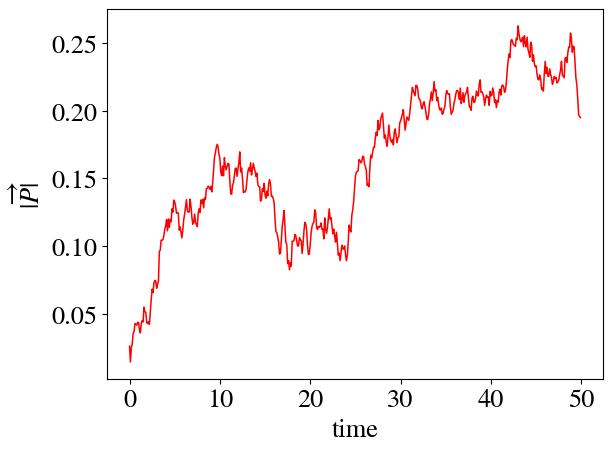

In [159]:

OP_str = read_dat_file_OP('params.dat')
datamsd=np.loadtxt(OP_str+'.dat')
time = datamsd[:,0]
sq_p = datamsd[:,1]
fig,ax = plt.subplots()

ax.plot(time,sq_p, lw=1.1, color='red')
ax.set_xlabel('time')
ax.set_ylabel(r'$|\overrightarrow{P}|$')
# ax.legend()
# ax.loglog()
# ax.set_ylim((0,2.5))
# plt.savefig(f'squared_displacement_N_{N}_wpersistence.png',dpi=200)
plt.show()